In [ ]:
import numpy as np
import os 
import tensorflow as tf
import keras 
from  keras.models import Sequential
import numpy  as np 
import matplotlib.pyplot as plt 
import cv2



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


item 00006.png


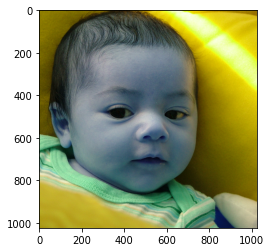

In [ ]:
photo_directory='/content/drive/MyDrive/without_mask'
for item in os.listdir(photo_directory)[:1]:
  print("item", item)
  image_arr=cv2.imread(os.path.join(photo_directory, "00000.png"))
  plt.imshow(image_arr)
 

In [ ]:
image_arr.shape

(1024, 1024, 3)

paths : /content/drive/MyDrive/without_mask
(1024, 1024, 3)
paths : /content/drive/MyDrive/with_mask
(1024, 1024, 3)


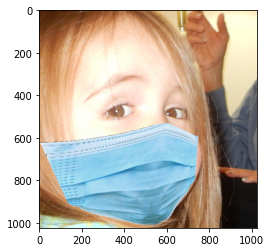

In [ ]:
photos_dir='/content/drive/MyDrive/'
categories=['without_mask', 'with_mask']
for cotegory in categories:
  path=os.path.join(photos_dir,cotegory)
  print("paths :", path)
  for item in os.listdir(path)[:1]:
    image_path=os.path.join(path,item)
    img_arr=cv2.imread(image_path)
    print(img_arr.shape)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB))




In [ ]:
 main_path='/content/drive/MyDrive'
 categories= ['with_mask', 'without_mask']
 image_size=224
 for category in categories:
   print(categories.index(category))

train_data=[]

 
 def append_to_list():
   for category in categories:
     path=os.path.join(main_path,category)
     indexes=categories.index(category)
     for image  in os.listdir(path):
       image_path=os.path.join(path, image)
       image_array=cv2.imread(image_path,cv2.COLOR_BGR2RGB)
       sized_image=cv2.resize(image_array,(image_size, image_size))
       train_data.append([sized_image,indexes])
    



append_to_list()
print("all the data has been appended to the train_list")

0
1
all the data has been appended to the train_list


In [ ]:


import random 
random.shuffle(train_data)
print(len(train_data))

1960


In [ ]:
x_train=[]
y_train=[]
for features,labels in train_data:
  x_train.append(features)
  y_train.append(labels)
  

In [ ]:
x_train_data=np.array(x_train).reshape(-1,image_size,image_size,3)

In [ ]:
x_train_data.shape

(1960, 224, 224, 3)

In [ ]:
x_train_data=x_train_data/255.0


In [ ]:
x_train_data[0].shape

(224, 224, 3)

In [ ]:
x_train_data[0][0]

array([[0.12941176, 0.34509804, 0.38823529],
       [0.1254902 , 0.34117647, 0.38431373],
       [0.12941176, 0.34117647, 0.38431373],
       [0.12156863, 0.32941176, 0.37647059],
       [0.12156863, 0.32941176, 0.37647059],
       [0.10980392, 0.32156863, 0.36470588],
       [0.10588235, 0.31764706, 0.36078431],
       [0.10980392, 0.31372549, 0.36078431],
       [0.09803922, 0.30196078, 0.35294118],
       [0.09411765, 0.29803922, 0.34901961],
       [0.08235294, 0.28235294, 0.33333333],
       [0.07058824, 0.28235294, 0.3254902 ],
       [0.0627451 , 0.2745098 , 0.31764706],
       [0.06666667, 0.26666667, 0.31764706],
       [0.05882353, 0.26666667, 0.30588235],
       [0.05490196, 0.2627451 , 0.30196078],
       [0.05882353, 0.26666667, 0.30588235],
       [0.05490196, 0.25882353, 0.29803922],
       [0.0627451 , 0.25882353, 0.28235294],
       [0.05098039, 0.23529412, 0.26666667],
       [0.04313725, 0.22352941, 0.2745098 ],
       [0.09411765, 0.25098039, 0.34901961],
       [0.

In [ ]:
y_train=np.array(y_train)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
len(y_train)

1960

In [ ]:
import pickle

# pickling=open("x_train_data.pickle",'wb')
# pickle.dump(x_train_data,pickling)
# pickling.close()
pickling=open("y_train.pickle",'wb')
pickle.dump(y_train,pickling)
pickling.close()

In [ ]:
# pickle_in= open('/content/x_train_data.pickle','rb')
# x_train_data=pickle.load(pickle_in)




In [ ]:
pickle_in_y= open('/content/y_train.pickle','rb')
y_train=pickle.load(pickle_in_y)

# New Section

In [ ]:
import keras
from keras.layers import Dense,Activation
from keras import layers


In [ ]:
model= keras.applications.mobilenet.MobileNet()

In [ ]:
base_input=model.layers[0].input


In [ ]:
base_output=model.layers[-4].output


In [ ]:
flatting=layers.Flatten()(base_output)
last_dense=layers.Dense(1)(flatting)
layers_activation= layers.Activation('sigmoid')(last_dense)



In [ ]:
new_model=keras.Model(inputs=base_input, outputs=layers_activation)

In [ ]:
new_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(x_train_data.shape)
print(y_train.shape)

(1960, 224, 224, 3)
(1960,)


In [ ]:
new_model.fit(x_train_data, y_train, epochs=1, validation_split=0.1)

56/56 [==============================] - 354s 6s/step - loss: 0.0895 - accuracy: 0.9586 - val_loss: 0.9784 - val_accuracy: 0.8622


In [ ]:
new_model.save('face_mask1.h5')



In [ ]:
upload_model=keras.models.load_model('/content/face_mask.h5/')

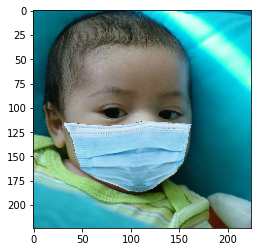

In [ ]:
trial_photo=photo_directory='/content/drive/MyDrive/with_mask/00000_Mask.jpg'
trial_photo=cv2.imread(trial_photo)
trial_photo= cv2.cvtColor(trial_photo, cv2.COLOR_BGR2RGB)
trial_photo=cv2.resize(trial_photo,(224,224))
plt.imshow(trial_photo)


In [ ]:
trial_photo.shape
trial_photo=trial_photo/255.0
trial_photo= np.expand_dims(trial_photo, axis=0)


In [ ]:
pred=new_model.predict(trial_photo)

In [ ]:
pred

array([[2.3985393e-13]], dtype=float32)

In [ ]:
faceCasCade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

frame = cv2.imread('/content/lauren.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray.shape


(400, 286)

In [ ]:
faces= faceCasCade.detectMultiScale(gray, 1.3, 5)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0,0),2)
    facess= faceCasCade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("no photos")
    else:
        for (ex, ey,ew, eh) in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]




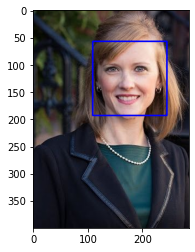

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

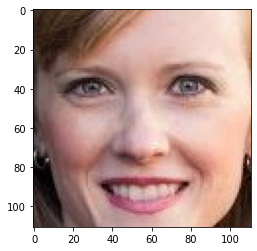

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_face=cv2.resize(face_roi,(224,224))
final_array= np.expand_dims(final_face, axis=0)
final_array=final_array/255.0


In [ ]:
final_array.shape

(1, 224, 224, 3)

In [ ]:
predi=new_model.predict(final_array)

In [ ]:
predi

array([[0.9996519]], dtype=float32)

In [ ]:
print(tf.__version__)

2.4.0
